In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

This notebook was prepared for [CESIUM]'s Geek Night (14/10/2021). It shows how to create and visualize the Fourier transform of an image, as well as applying high and low pass filters to the transform.

Most of the code comes from a [post](https://hicraigchen.medium.com/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82) from Craig Chen. Check the original post for more detailed information regarding the filters.

The image used in this example is from a t-shirt available at CESIUM's shop.


In [2]:
import cv2
image = cv2.imread("tshirt.png", 0)
original = np.fft.fft2(image)
center = np.fft.fftshift(original)

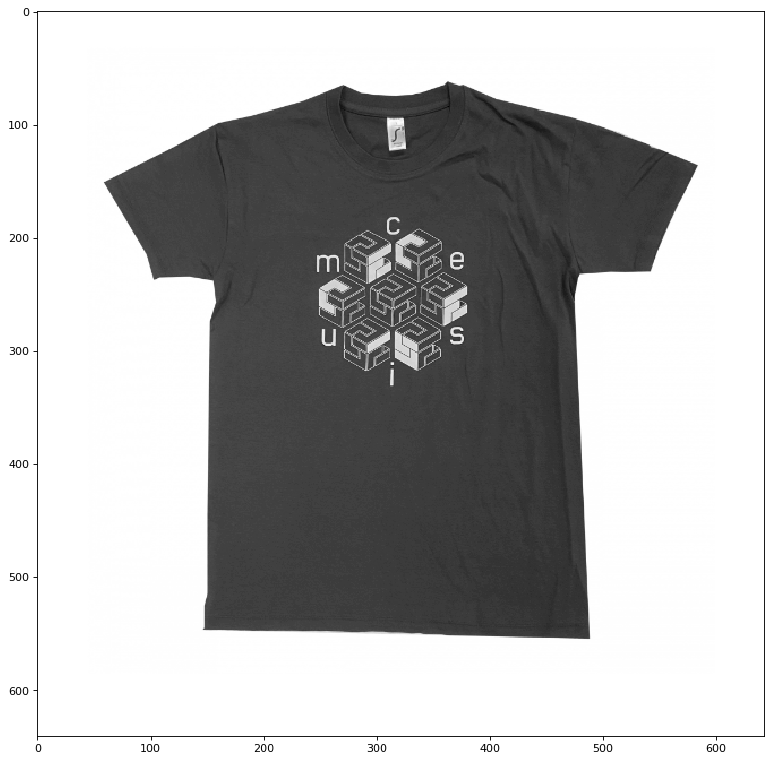

In [3]:
image_grey = rgb2gray(image)
plt.figure(num=None, figsize=(16, 12), dpi=80)
plt.imshow(image_grey, cmap='gray');

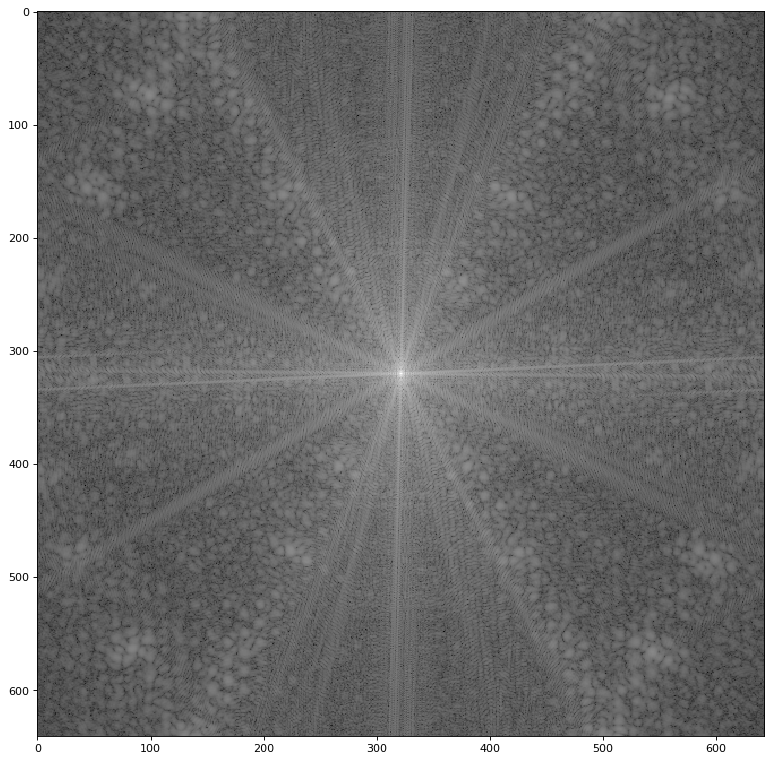

In [4]:
image_grey_fourier = np.fft.fftshift(np.fft.fft2(image_grey))
plt.figure(num=None, figsize=(16, 12), dpi=80)
plt.imshow(np.log(abs(image_grey_fourier)), cmap='gray');

In [5]:
from math import exp,sqrt

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0.000001
    return base


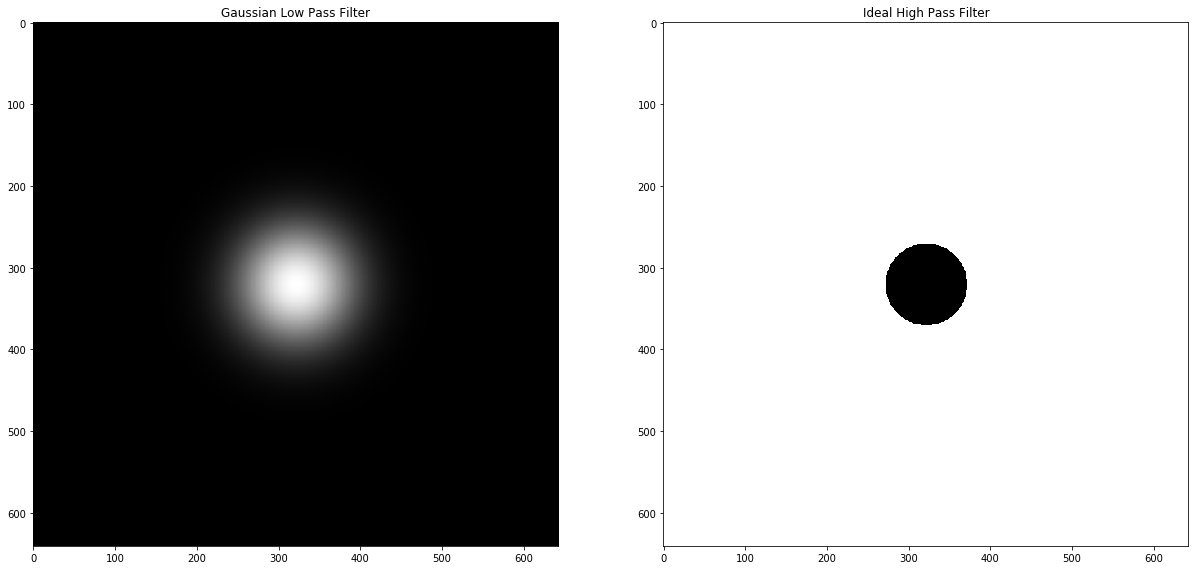

In [6]:
filter_strength = 50

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

GaussianLP = gaussianLP(filter_strength,image.shape)
plt.subplot(131), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")


IdealHP = idealFilterHP(filter_strength,image.shape)
plt.subplot(132), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

plt.show()


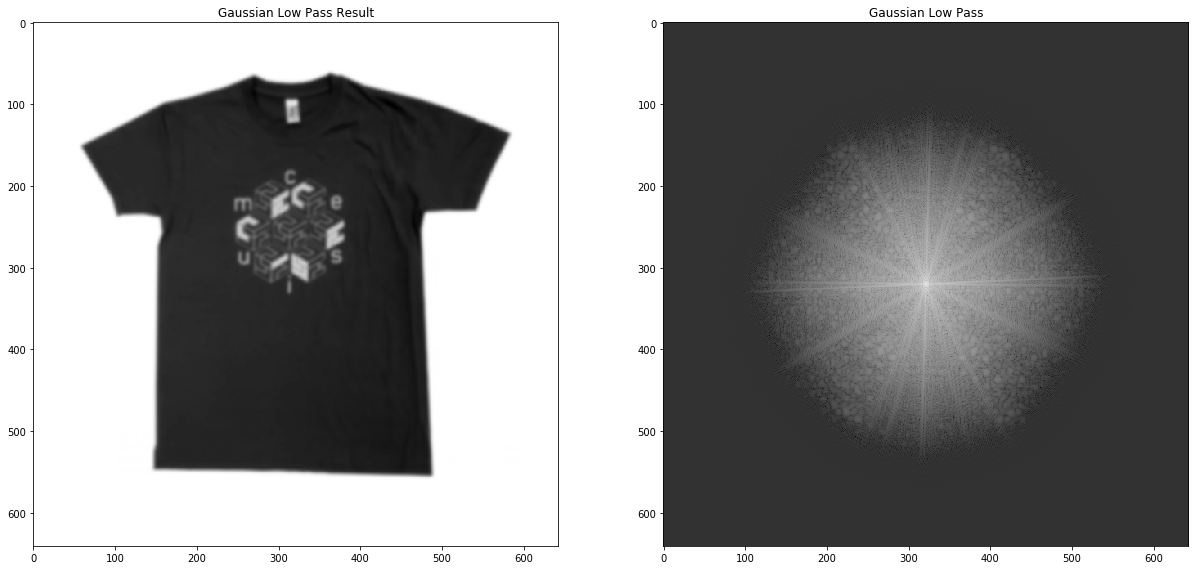

In [9]:

original = np.fft.fft2(image)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)


LowPassCenter = center * gaussianLP(filter_strength,image.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass Result")
plt.subplot(132), plt.imshow(np.log(abs(LowPassCenter+1)), cmap='gray'), plt.title("Gaussian Low Pass")
plt.show()


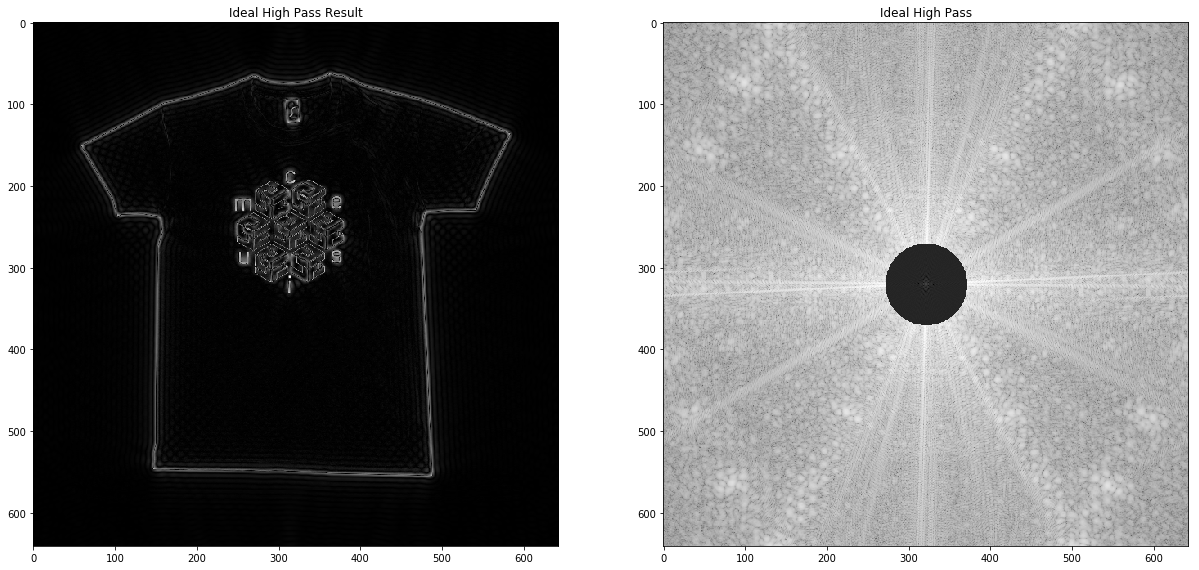

In [10]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(filter_strength,image.shape)

HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)

plt.subplot(231), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass Result")
plt.subplot(232), plt.imshow(np.log(abs(HighPassCenter+1)), 'gray'), plt.title("Ideal High Pass")


plt.show()